In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4(Total) 4(Edge) 0(Trace)
[Mesh] Number of Nodes:4(Total) 4(Edge) 0(Trace) 0(Source)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100), (1, 50), (2, 50)]


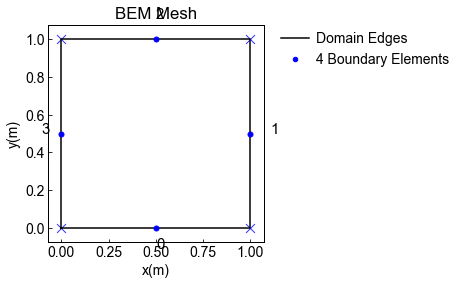

In [4]:
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh-#Anti-clock wise for internal domain
Boundary_vert=[(0.0, 0.0), (1, 0.0),(1,1.0),(0.0,1.0)]  #bottom
element_esize=1.0

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Const")
#2.Set Boundary condition
bc0=[(3,100),(1,50),(2,50)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)#,RobinBC=bc1)

#bc0=[(3,100)]
#bc1=[(1,-50)]
#BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)#,RobinBC=bc1)

#3.Set Domain Properties - permeability tensor
k11=2
k12=0
k22=2
k_tensor=[k11,k12,k22]
BEM_Case1.SetProps(k_tensor)

#Check Mesh
BEM_Case1.plot_Mesh()
#Check Node,BC if necessary
#BEM_Case1.Mesh.print_debug()

In [6]:
from PyBEM2D.BEM_Solver.Elements.Exact_Integration import *

In [7]:
Analytical_Intergration_cython(0.5,0.5,BEM_Case1.BEs_edge[0],BEM_Case1.k)

([0.907749017162497, -1.0, -1.0],
 [-3.141592653589793, -1.0, -1.0],
 [0.0, -1.0, -1.0],
 [-1.5707963267948966, -1.0, -1.0],
 [-0.0, -1.0, -1.0],
 [4.0, -1.0, -1.0])

In [27]:
BEM_Case1.k_coeff

0.15915494309189535

In [31]:
0.5611754268825244*0.15915494309189535

0.08931384313005825

In [29]:
Analytical_Intergration_cython(0.5,0.5,BEM_Case1.BEs_edge[0],BEM_Case1.k)

([0.907749017162497, -1.0, -1.0],
 [-3.141592653589793, -1.0, -1.0],
 [0.0, -1.0, -1.0],
 [-1.5707963267948966, -1.0, -1.0],
 [-0.0, -1.0, -1.0],
 [4.0, -1.0, -1.0])

In [30]:
BEM_Case1.k_coeff

0.07957747154594767

In [32]:
0.907749017162497*0.07957747154594767

0.07223637158411057

In [15]:
%timeit Analytical_Intergration_cython(0.25,0.1,BEM_Case1.BEs_edge[0],BEM_Case1.k)

2.09 µs ± 35.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%timeit Analytical_Intergration_python(0.25,0.1,BEM_Case1.BEs_edge[0],BEM_Case1.k)

44.8 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
Analytical_Intergration_python(0.01,0.01,BEM_Case1.BEs_edge[0],BEM_Case1.k)

In [116]:
3.1415/1.1515151515151507

2.7281447368421072

In [73]:
-1.736055757838555/0.2893426263064255

-6.000000000000007